# Automobile Data Model Building and Development

![Automobile Industry](https://th.bing.com/th/id/OIP.Txqu0ECTihNPPhpqMzSyLgHaEL?w=238&h=184&c=7&r=0&o=5&dpr=1.3&pid=1.7)

## In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

### Some questions we want to ask in this notebook
<ul>
    <li>Do I know if the dealer is offering fair value for my trade-in?</li>
    <li>Do I know if I put a fair value on my car?</li>
</ul>

### In data analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.
### A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.


#  Installing libraries


In [1]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3-y
#! mamba install numpy=1.21.2-y
#! mamba install sklearn=0.20.1-y


Looking for: ['pandas==1.3.3-y']

warning  libmamba Cache file "/opt/conda/pkgs/cache/c6f2354e.json" was modified by another program
[+] 0.0s
[+] 0.1s
rapidsai/linux-64 (check zst) ━━━━╸━━━━━━━━━━   0.0 B @  ??.?MB/s Checking  0.1s[+] 0.2s
rapidsai/linux-64 (check zst) ━━━━╸━━━━━━━━━━   0.0 B @  ??.?MB/s Checking  0.2s[+] 0.3s
rapidsai/linux-64 (check zst) ━━━━━╸━━━━━━━━━   0.0 B @  ??.?MB/s Checking  0.3s[+] 0.4s
rapidsai/linux-64 (check zst) ━━━━━╸━━━━━━━━━   0.0 B @  ??.?MB/s Checking  0.4s[+] 0.5s
rapidsai/linux-64 (check zst) ━━━━━╸━━━━━━━━━   0.0 B @  ??.?MB/s Checking  0.5s[+] 0.6s
rapidsai/linux-64 (check zst) ━━━━━╸━━━━━━━━━   0.0 B @  ??.?MB/s Checking  0.6s[+] 0.7s
rapidsai/linux-64 (check zst) ━━━━━╸━━━━━━━━━   0.0 B @  ??.?MB/s Checking  0.7s[+] 0.8s
rapidsai/linux-64 (check zst) ━━━━━╸━━━━━━━━━   0.0 B @  ??.?MB/s Checking  0.8s[+] 0.9s
rapidsai/linux-64 (check zst) ━━━━━╸━━━━━━━━━   0.0 B @  ??.?MB/s Checking  0.9s[+] 1.0s
rapidsai/linux-64 (check zst) ━━━━━╸━━━━━━━━━  

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Now let's load the data and store it in dataframe `df`:

In [3]:
df = pd.read_csv("/kaggle/input/automobile-dataset/Automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# 1. Linear Regression and Multiple Linear Regression</h2>


# Linear Regression


### One example of a Data  Model that we will be using is:
### Simple Linear Regression

### Simple Linear Regression is a method to help us understand the relationship between two variables:
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

### The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.



$$
 Y: Response \ Variable\\\\
 X: Predictor \ Variables
$$


## <b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


<h3>Let's load the modules for linear regression:</h4>


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

<h1>Create the linear regression object:</h4>


In [17]:
lm = LinearRegression()
lm

LinearRegression()

<h2>How could "highway-mpg" help us predict car price?</h4>


### For this example, we want to look at how highway-mpg can help us predict car price.
### Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.


# Data Cleaning

In [25]:
missing_values = df.isnull().sum()
df.dropna(inplace=True)

In [26]:
# Convert the 'price' column to numeric
df['price'] = pd.to_numeric(df['price'])

# Create X and Y variables
X = df[['highway-mpg']]
Y = df['price']


imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent' for mode
df['price'] = imputer.fit_transform(df[['price']])
X = imputer.fit_transform(X)

# Fit the model
lm.fit(X, Y)

LinearRegression()

# Fit the linear model using highway-mpg:


### We can output a prediction:


In [27]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([12809.86873425, 18052.11958005, 16086.27551287, 19362.6822915 ,
       13465.15008997])

<h2>Value of the intercept (a)</h2>


In [28]:
lm.intercept_

32468.309406001994

<h2>Value of the slope (b)</h2>


In [29]:
lm.coef_

array([-655.28135573])

<h2>The final estimated linear model we get</h2>


### As we saw above, we should get a final linear model with the structure:


$$
Yhat = a + b  X
$$


## Plugging in the actual values we get:


## <b>Price</b> = 32468.30 - 655.281 x <b>highway-mpg</b>

## Creating a linear regression object called "lm1"

In [30]:
lm1 = LinearRegression()
lm1

LinearRegression()

## Training the model using "engine-size" as the independent variable and "price" as the dependent variable

In [31]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

# Slope and intercept of the model

<h2>Slope</h4>


In [32]:
# Slope 
lm1.coef_

array([[162.37891192]])

<h2>Intercept</h4>


In [33]:
# Intercept
lm1.intercept_

array([-7914.12599586])

## Equation of the predicted line

In [35]:
# using X and Y  
Yhat=-7914.12 + 162.37*X

df[['price']]=-7914.12 + 162.37*df[['engine-size']]

<h1>Multiple Linear Regression</h1>


## What if we want to predict car price using more than one variable?
## If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>
## Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
## Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:


$$
Y: Response \ Variable\\\\
X_1 :Predictor\ Variable \ 1\\\\
X_2: Predictor\ Variable \ 2\\\\
X_3: Predictor\ Variable \ 3\\\\
X_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\
b_1 :coefficients \ of\ Variable \ 1\\\\
b_2: coefficients \ of\ Variable \ 2\\\\
b_3: coefficients \ of\ Variable \ 3\\\\
b_4: coefficients \ of\ Variable \ 4\\\\
$$


## The equation is given by:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


## From the previous section  we know that other good predictors of price could be:
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>

## Let's develop a model using these variables as the predictor variables.

In [36]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

## Fit the linear model using the four above-mentioned variables.

In [37]:
lm.fit(Z, df['price'])

LinearRegression()

# Value of the intercept(a)


In [38]:
lm.intercept_

-7963.339999999991

# Values of the coefficients (b1, b2, b3, b4)


In [39]:
lm.coef_

array([ 3.54699524e-14, -1.06581410e-14,  1.66860000e+02,  5.14449594e-14])

# Final estimated linear model that we get


## As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

## Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and  "highway-mpg".

In [40]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

## The coefficient of the model

In [41]:
lm2.coef_

array([  10.81572622, -550.65938884])

<h1>Model Evaluation Using Visualization</h1>


## Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

## Import the visualization package, seaborn:

In [42]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h1>Regression Plot</h1>


## When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.

## This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation)


## Let's visualize **highway-mpg** as potential predictor variable of price:

(0.0, 37001.442608948404)

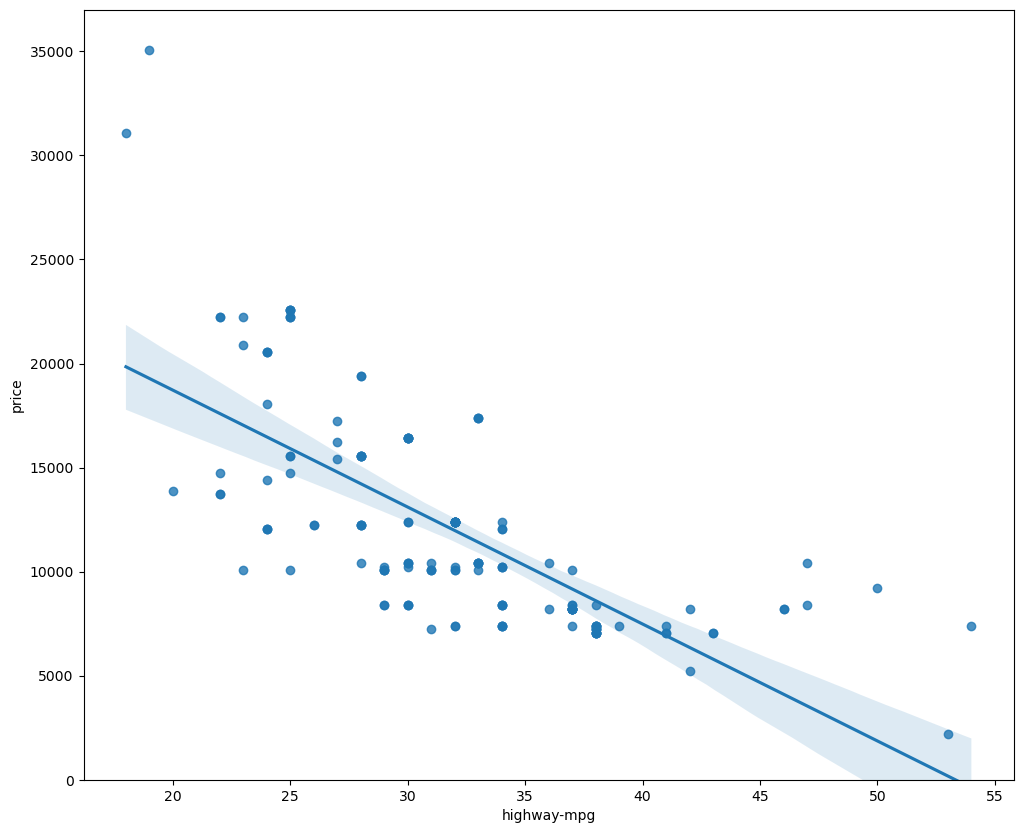

In [43]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

## We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

## One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

## Let's compare this plot to the regression plot of "peak-rpm".


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U4'), dtype('float64')) -> None

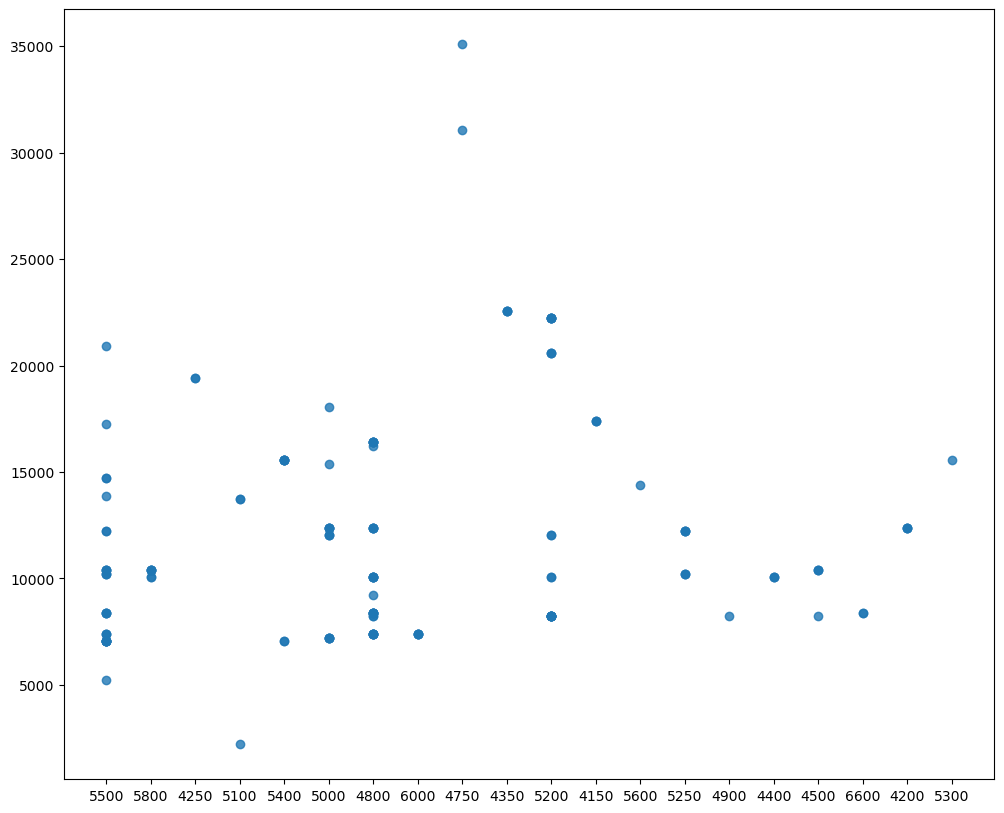

In [45]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

## Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.


## Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method  ".corr()" to verify it.

In [46]:
df[["peak-rpm","highway-mpg","price"]].corr()

/tmp/ipykernel_32/256990607.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[["peak-rpm","highway-mpg","price"]].corr()


,highway-mpg,price
highway-mpg,1.000000,-0.714095
price,-0.714095,1.000000


<h1>Residual Plot</h1>

## A good way to visualize the variance of the data is to use a residual plot.

## What is a <b>residual</b>?

### The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

## So what is a <b>residual plot</b>?

### A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

## What do we pay attention to when looking at a residual plot?

### We look at the spread of the residuals:

### - If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

### Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.


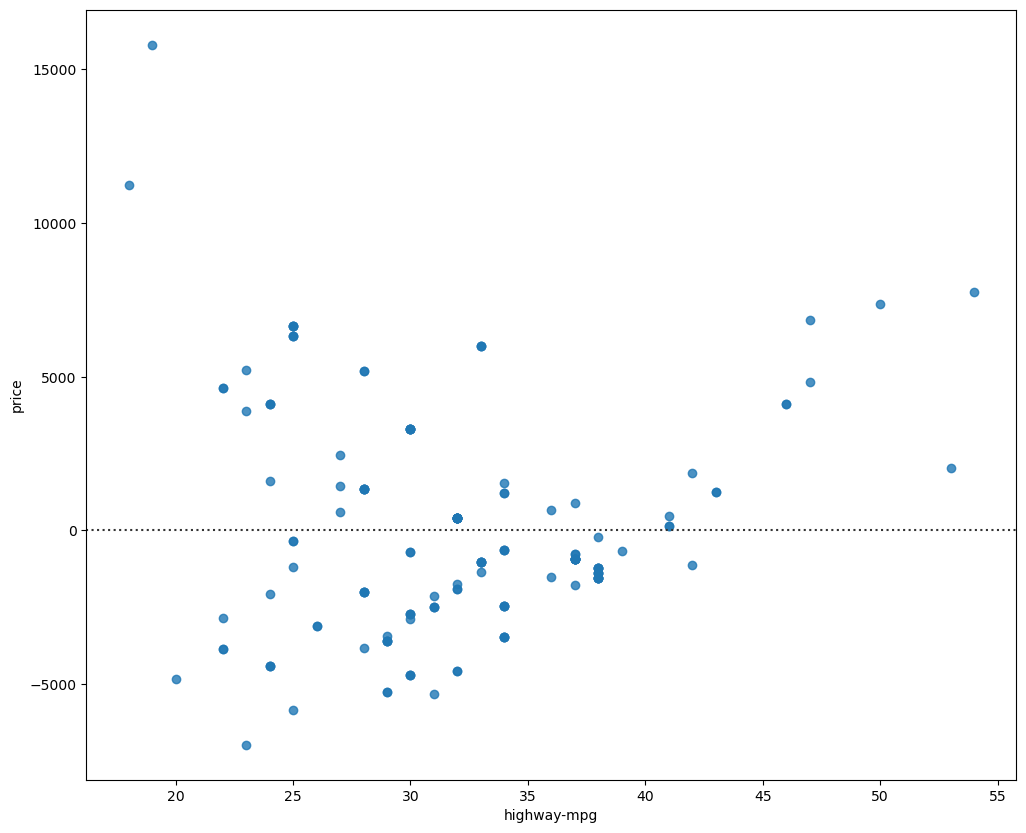

In [47]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

## What is this plot telling us?
### We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

<h1>Multiple Linear Regression</h1>

## How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.
## One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

## First, let's make a prediction:

In [48]:
Y_hat = lm.predict(Z)

/tmp/ipykernel_32/4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/tmp/ipykernel_32/4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

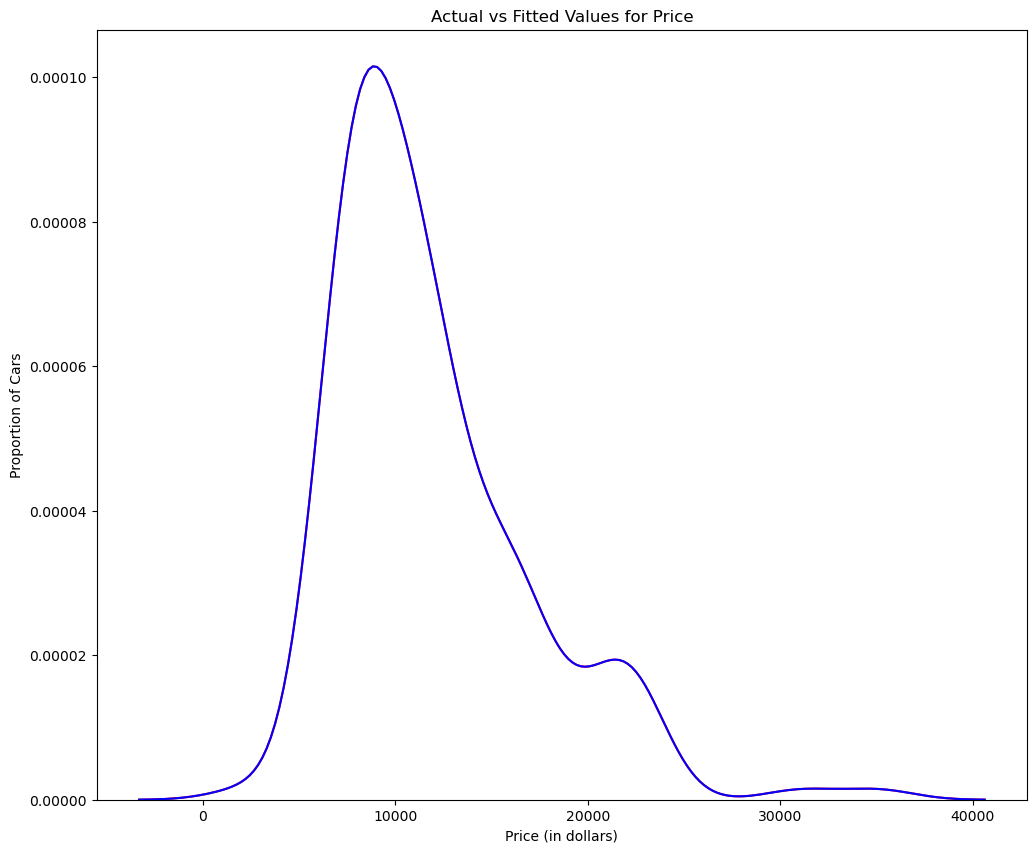

In [49]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

<h1>Polynomial Regression and Pipelines</h1>

## <b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.
## We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.
## There are different orders of polynomial regression:

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$


<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$


<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


### We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

### We will use the following function to plot the data:

In [50]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

### Let's get the variables:


In [51]:
x = df['highway-mpg']
y = df['price']

### Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


In [52]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

         3         2
-0.5868 x + 87.22 x - 4372 x + 8.063e+04


### Let's plot the function:


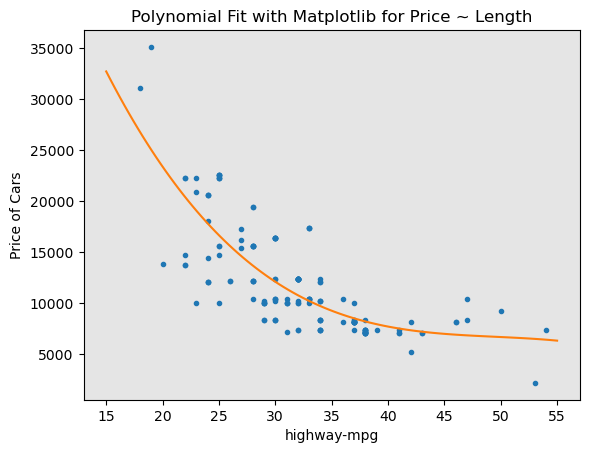

In [53]:
PlotPolly(p, x, y, 'highway-mpg')

In [54]:
np.polyfit(x, y, 3)

array([-5.86830394e-01,  8.72173500e+01, -4.37233504e+03,  8.06314049e+04])

### We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.

# Create 11 order polynomial model with the variables x and y from above.

           11             10            9          8         7
2.222e-08 x  - 8.845e-06 x  + 0.001582 x - 0.1678 x + 11.72 x
          6             5             4             3             2
 - 565.5 x + 1.923e+04 x - 4.605e+05 x + 7.609e+06 x - 8.257e+07 x + 5.294e+08 x - 1.519e+09


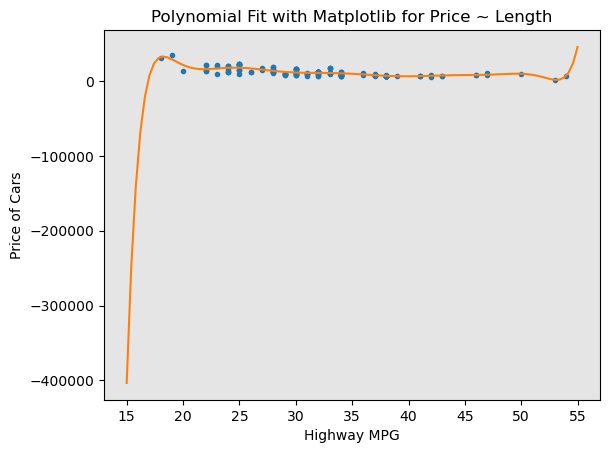

In [55]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

### he analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


### We can perform a polynomial transform on multiple features. First, we import the module:


In [56]:
from sklearn.preprocessing import PolynomialFeatures

### We create a <b>PolynomialFeatures</b> object of degree 2: 


In [57]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [58]:
Z_pr=pr.fit_transform(Z)

### In the original data, there are 159 samples and 4 features.


In [59]:
Z.shape

(159, 4)

### After the transformation, there are 159 samples and 15 features.


In [60]:
Z_pr.shape

(159, 15)

# Pipeline


## Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [62]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

## We input the list as an argument to the pipeline constructor:


In [63]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

### First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

### Then, we can normalize the data,  perform a transform and fit the model simultaneously. 


In [64]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

## Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.


In [65]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([10224.4 , 14729.62, 14729.62, 13895.32])

## Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [66]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([10224.4 , 14729.62, 14729.62, 13895.32, 10057.54, 10057.54,
       19401.7 , 19401.7 ,  2215.12,  7054.06])

# Measures for In-Sample Evaluation

## When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.
## Two very important measures that are often used in Statistics to determine the accuracy of a model are:
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
## <b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

## <b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


# Model 1: Simple Linear Regression

## Let's calculate the R^2:


In [67]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.5185297491395178


We can say that ~51% of the variation of the price is explained by this simple linear model "horsepower_fit".


## Let's calculate the MSE:


### We can predict the output i.e., "yhat" using the predict method, where X is the input variable:


In [68]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [12809.86873425 18052.11958005 16086.27551287 19362.6822915 ]


### Let's import the function <b>mean_squared_error</b> from the module <b>metrics</b>:


In [69]:
from sklearn.metrics import mean_squared_error

### We can compare the predicted results with the actual results:


In [70]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  13177328.905126387


# Model 2: Multiple Linear Regression

## Let's calculate the R^2:


In [71]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  1.0


## We can say that ~100 % of the variation of price is explained by this multiple linear regression "multi_fit".


## Let's calculate the MSE.


## We produce a prediction:


In [72]:
Y_predict_multifit = lm.predict(Z)

## We compare the predicted results with the actual results:


In [73]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  1.3047603624421341e-23


# Model 3: Polynomial Fit

## Let's calculate the R^2.


### Let’s import the function <b>r2_score</b> from the module <b>metrics</b> as we are using a different function.


In [74]:
from sklearn.metrics import r2_score

## We apply the function to get the value of R^2:


In [75]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6130820419015302


## We can say that ~61 % of the variation of price is explained by this polynomial fit.


<h2>MSE</h2>


## We can also calculate the MSE:  


In [76]:
mean_squared_error(df['price'], p(x))

9932662.738841591

# Prediction and Decision Making
<h2>Prediction</h2>

## In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.


In [77]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

## Create a new input:


In [78]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

 ## Fit the model:


In [79]:
lm.fit(X, Y)
lm

LinearRegression()

## Produce a prediction:


In [80]:
yhat=lm.predict(new_input)
yhat[0:5]

array([31813.02805028, 31157.74669455, 30502.46533883, 29847.1839831 ,
       29191.90262738])

## We can plot the data:


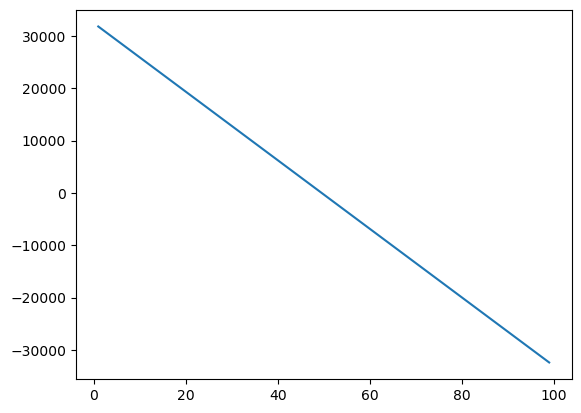

In [81]:
plt.plot(new_input, yhat)
plt.show()

# Decision Making: Determining a Good Model Fit

## Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>

## When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>


## When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.


<h2>Let's take a look at the values for the different models.</h2>

### Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.5185297491395178</li>
    <li>MSE: 1.317 x10^7</li>
</ul>

### Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 1</li>
    <li>MSE: 1.3047 x10^7</li>
</ul>
    
### Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6130820419015302</li>
    <li>MSE: 9.93 x 10^7</li>
</ul>


# Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)

## Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

## In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  1.317x10^7  while MLR has an MSE of 1.3047 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.51) is very small compared to the R-squared for the MLR (~1).</li>
</ul>

## This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


# Simple Linear Model (SLR) vs. Polynomial Fit

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>

## Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

# Multiple Linear Regression (MLR) vs. Polynomial Fit

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


# Conclusion

## Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.